In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import altair as alt

# Cargar los datos
df = pd.read_csv('/workspaces/linea_temporal_alternativa/data/raw/Aquifer_Petrignano.csv')

# Imputar valores nulos con fordward fill y backwardfill
for column_name in df.select_dtypes(include='number').columns:
    df[column_name] = df[column_name].fillna(method='bfill').fillna(method='ffill')

# Preprocesamiento de la fecha
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['DayOfYear'] = df['Date'].dt.dayofyear


In [69]:

# Dividir los datos en train y test
X = df.select_dtypes(include='number').drop('Depth_to_Groundwater_P24', axis=1)
y = df['Depth_to_Groundwater_P24']

# crear instancia TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Crear modelo de regresión lineal y listas para almacenar las métricas
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# metricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)




In [79]:

# Imprimir resultados promedio y desviación estándar de las métricas
print(f' MSE: {mse}')
print(f'Mean RMSE: {rmse}')
print(f'Mean R^2: {r2}')

# Entrenar el modelo con todos los datos
model.fit(X, y)


 MSE: 0.02365425283888389
Mean RMSE: 0.15379939154263222
Mean R^2: 0.9694009831149214


LinearRegression()

In [80]:

# Realizar predicciones y guardarlas en una nueva columna
df['Depth_to_Groundwater_P24_Prediction'] = model.predict(X)




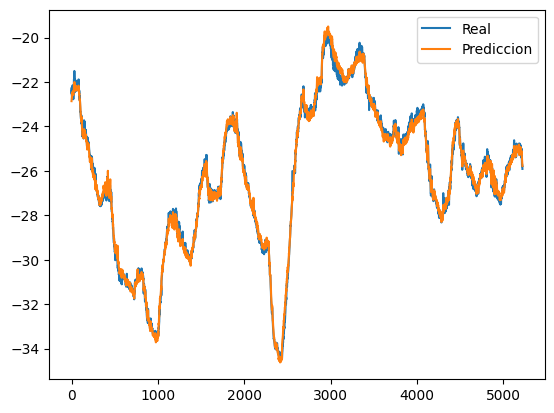

In [81]:
# Grafico de los datos
ax1 = plt.plot(df['Depth_to_Groundwater_P24'])
ax2 = plt.plot(df['Depth_to_Groundwater_P24_Prediction'])
plt.legend(['Real','Prediccion'])